# Part I- Loan Dataset Exploration
## by Kingsley Ubani

## Introduction
- This document describes the Loan Data-Set from Prosper. It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income and many others.
 



## Preliminary Wrangling


In [1]:
# import all necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Load the Loan data-set

loan_df = pd.read_csv('prosperLoanData.csv')
loan_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
# Examine the columns in the data-set

loan_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# Select the columns of interest for exploration and assign to the spec_columns variable
# Also assign the spec_columns to a new Dataframe, 'newloan_data'

spec_columns = ['LoanStatus', 'CreditGrade', 'EmploymentStatus','Occupation','IsBorrowerHomeowner','IncomeRange',
        'IncomeVerifiable', 'LoanOriginalAmount', 'Term', 'BorrowerRate']
newloan_data = loan_df[spec_columns]

In [6]:
# Checking the records in the new datafrane

newloan_data.shape
newloan_data.sample(10)
newloan_data.describe()
newloan_data.head()

,LoanStatus,CreditGrade,EmploymentStatus,Occupation,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,LoanOriginalAmount,Term,BorrowerRate
0,Completed,C,Self-employed,Other,True,"$25,000-49,999",True,9425,36,0.1580
1,Current,NaN,Employed,Professional,False,"$50,000-74,999",True,10000,36,0.0920
2,Completed,HR,Not available,Other,False,Not displayed,True,3001,36,0.2750
3,Current,NaN,Employed,Skilled Labor,True,"$25,000-49,999",True,10000,36,0.0974
4,Current,NaN,Employed,Executive,True,"$100,000+",True,15000,36,0.2085


### What is the structure of your dataset?

- The Loan data-set contains 113,937 loans with 81 columns.

### What is/are the main feature(s) of interest in your dataset?

1. What factors affect Loan's outcome status?
2. What factors affect borrowers's APR or Interest Rate?
3. Are there differences between loans depending  on how large the original loan amount was?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- All the features assigned to the spec_columns variable.

They include; 'LoanStatus', 'CreditGrade', 'EmploymentStatus','Occupation','IsBorrowerHomeowner','IncomeRange',
        'IncomeVerifiable', 'LoanOriginalAmount', 'Term', 'BorrowerRate'.

## Univariate Exploration

### Examining the chosen feautures of interest



#### BorrowerRate


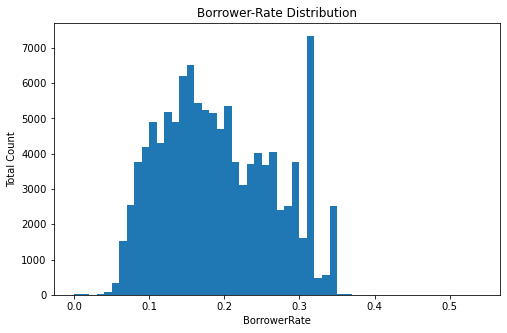

In [7]:
# Looking at the distribution of 'Borrower APR', using a histogram.

plt.figure(figsize = [8, 5]) 
bins = np.arange(0, newloan_data.BorrowerRate.max() + 0.05, 0.01)
plt.hist(data = newloan_data, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.ylabel('Total Count')
plt.title('Borrower-Rate Distribution');

This is clearly a multimodal distribution with the highest spike at 0.3177 interest rate. This means most borrowers prefer to borrow at 0.3177 interest rate, as it has the greatest number.

### Income Range

In [8]:
newloan_data['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [9]:
# Assigning the IncomeRange entries to IncomeRange_sortd

IncomeRange_sortd = newloan_data.IncomeRange.value_counts().sort_values(ascending = True)
IncomeRange_sortd

$0                  621
Not employed        806
$1-24,999          7274
Not displayed      7741
$75,000-99,999    16916
$100,000+         17337
$50,000-74,999    31050
$25,000-49,999    32192
Name: IncomeRange, dtype: int64

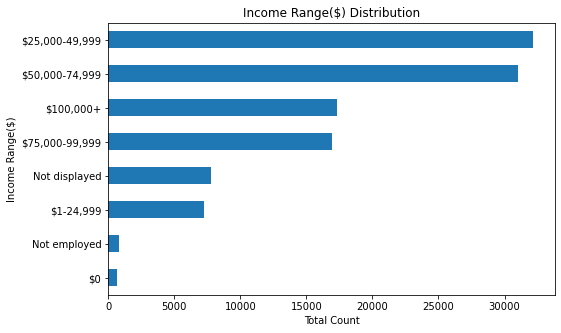

In [10]:
# Analysis on Income Range

plt.figure(figsize = [8, 5]) 
IncomeRange_sortd.plot(kind = 'barh', grid = False)
plt.xlabel('Total Count')
plt.ylabel('Income Range($)')
plt.title('Income Range($) Distribution');



From the chart, most of the loans are requested by the people with income range in category $25,000-49,999 

### Loan Status

In [11]:
newloan_data['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [12]:
# Renaming all the 'Past Due' entries in the LoanStatus column as Past Due

newloan_data.loc[newloan_data['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'
newloan_data[newloan_data['LoanStatus']=="Past Due"]

C:\Users\Kingsley.ubani\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,LoanStatus,CreditGrade,EmploymentStatus,Occupation,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,LoanOriginalAmount,Term,BorrowerRate
12,Past Due,NaN,Employed,Sales - Retail,False,"$25,000-49,999",True,4000,36,0.1435
82,Past Due,NaN,Employed,Other,False,"$50,000-74,999",True,4000,36,0.2932
139,Past Due,NaN,Other,Other,False,"$1-24,999",True,2500,36,0.2999
508,Past Due,NaN,Employed,Nurse's Aide,False,"$25,000-49,999",True,4500,36,0.2699
597,Past Due,NaN,Employed,Retail Management,True,"$50,000-74,999",True,23500,60,0.1551
...,...,...,...,...,...,...,...,...,...,...
113697,Past Due,NaN,Employed,Professional,False,"$75,000-99,999",True,4000,36,0.2487
113700,Past Due,NaN,Employed,Executive,True,"$100,000+",True,12500,36,0.2346
113748,Past Due,NaN,Other,Other,True,"$50,000-74,999",True,4000,36,0.2786
113769,Past Due,NaN,Employed,Analyst,True,"$75,000-99,999",True,2600,36,0.2786


In [49]:
# Checks
newloan_data['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [13]:
# convert LoanStatus, EmploymentStatus,CreditGrade into ordered categorical types
convtd_cols = {'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','FinalPaymentInProgress','Cancelled','Past Due'],
                 'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
                 'CreditGrade': ['C','D','B','AA','HR','A','E','NC']}

for var in convtd_cols:
    ordered_cols = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = convtd_cols[var])
    newloan_data[var] = newloan_data[var].astype(ordered_cols)

C:\Users\KINGSL~1.UBA\AppData\Local\Temp/ipykernel_26224/710006274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newloan_data[var] = newloan_data[var].astype(ordered_cols)


In [14]:
# Checks
newloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   LoanStatus           113937 non-null  category
 1   CreditGrade          28953 non-null   category
 2   EmploymentStatus     111682 non-null  category
 3   Occupation           110349 non-null  object  
 4   IsBorrowerHomeowner  113937 non-null  bool    
 5   IncomeRange          113937 non-null  object  
 6   IncomeVerifiable     113937 non-null  bool    
 7   LoanOriginalAmount   113937 non-null  int64   
 8   Term                 113937 non-null  int64   
 9   BorrowerRate         113937 non-null  float64 
dtypes: bool(2), category(3), float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [19]:
# Assigning the LoanStatus entries to loanstatus_convtd

loanstatus_convtd = newloan_data['LoanStatus'].value_counts().sort_values()
loanstatus_convtd

Cancelled                     5
FinalPaymentInProgress      205
Past Due                   2067
Defaulted                  5018
Chargedoff                11992
Completed                 38074
Current                   56576
Name: LoanStatus, dtype: int64

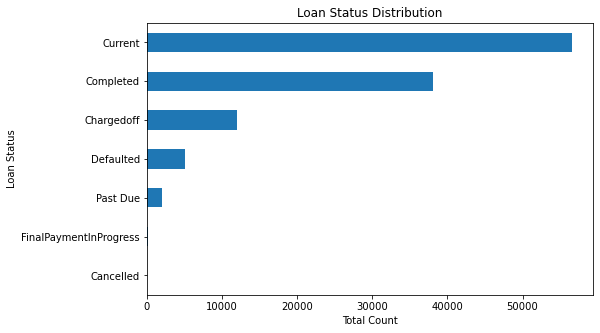

In [20]:
# Analysis on Loan Status

plt.figure(figsize = [8, 5]) 
loanstatus_convtd.plot(kind = 'barh')
plt.ylabel('Loan Status')
plt.xlabel('Total Count')
plt.title('Loan Status Distribution');

Apparently, majority of the loans are marked as Current and Completed.This means most loans are currently active and some have been fully paid respectively.

### Income Verifiable

In [21]:
newloan_data['IncomeVerifiable'].value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

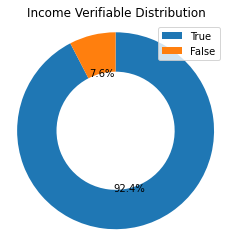

In [22]:
# Analysis on IncomeVerifiable

textprops = {"fontsize":10}
income_srtd = pd.DataFrame(newloan_data['IncomeVerifiable'].value_counts().reset_index())
labels = income_srtd['index']

plt.pie(data = income_srtd, x='IncomeVerifiable', labels = None, startangle = 90,
        counterclock = False, wedgeprops = {'width': 0.4}, autopct='%.1f%%', textprops =textprops);
plt.axis('square');
plt.title('Income Verifiable Distribution')
plt.legend(labels);

From the donut plot, the majority of borrowers' incomes are verifiable.

### Employment Status

In [23]:
newloan_data['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

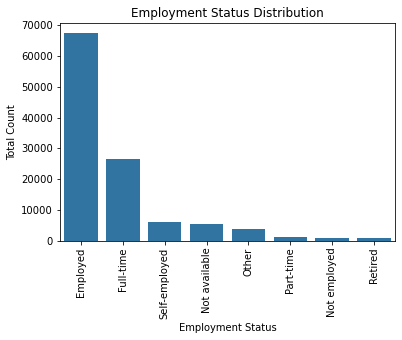

In [24]:
# Analysis on EmploymentStatus

base_color = sb.color_palette()[0]
sb.countplot(data = newloan_data, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation = 90)
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Total Count');

From the chart, most people whose loans were approved are considered Employed and Full-Time employees

### Term

In [25]:
newloan_data['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

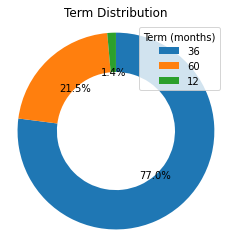

In [26]:
# Analysis on Term

term_srtd = pd.DataFrame(newloan_data['Term'].value_counts().reset_index())
labels = term_srtd['index']
textprops = {"fontsize":10}

plt.pie(data = term_srtd, x = 'Term', labels = None, startangle = 90,
        counterclock = False, wedgeprops = {'width': 0.4}, autopct='%.1f%%',
       textprops = textprops)
plt.axis('square')
plt.title('Term Distribution')
plt.legend(labels, title = 'Term (months)');


From the donut chart, it can be seen that a large percentage of the loan term is within 36-month period.

### Loan Original Amount

In [27]:
# Checking the statistical features of the column

newloan_data['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

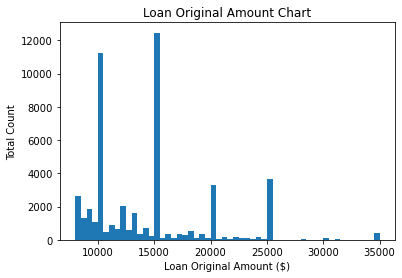

In [28]:
# Analysis on Loan Original Amount
#Also using the mean as the starting point

bins = np.arange(8000, newloan_data['LoanOriginalAmount'].max()+500, 500)
plt.hist(data = newloan_data, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Total Count')
plt.title('Loan Original Amount Chart');

The above chart shows that the loan amount mostly requested for are 15,000 and 10,000($)

### Occupation

In [29]:
occupation_plot= newloan_data['Occupation'].value_counts()
occupation_plot

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

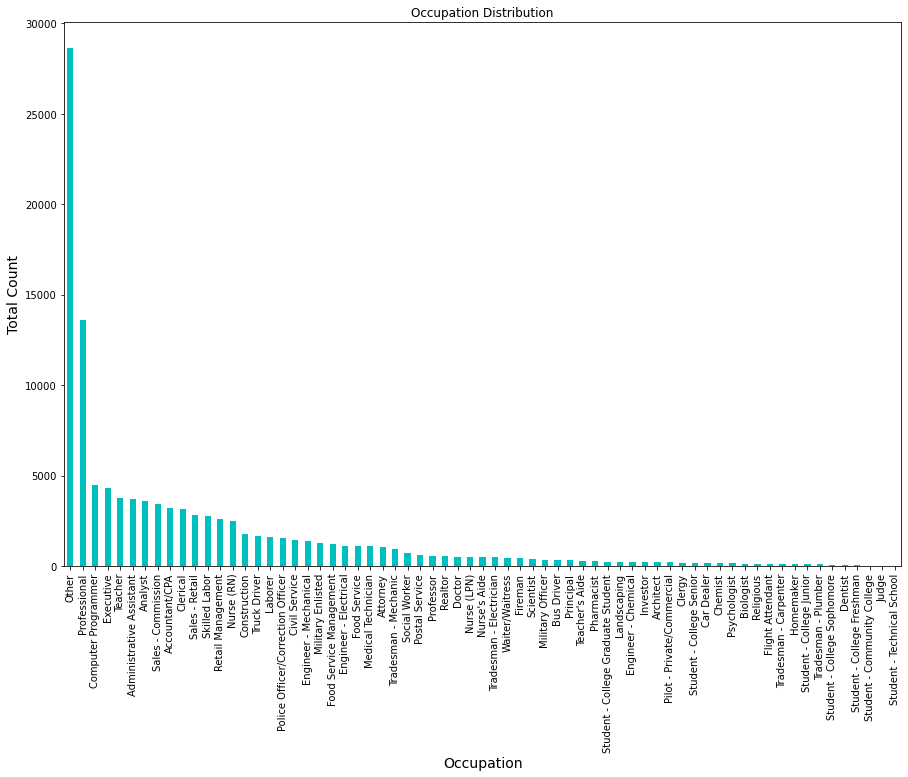

In [30]:
# Analysis on Occupation
occupation_plot.plot(kind="bar",figsize=(15,10),color='c')
plt.title ('Occupation Distribution')
plt.xlabel('Occupation',fontsize=14)
plt.ylabel('Total Count',fontsize=14);

The above chart shows that the occupation with the highest number of loan application is Others followed by Professional.

#### IsBorrowerHomeowner

In [31]:
newloan_data['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

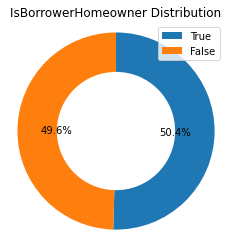

In [32]:
# Analysis on IsBorrowerHomeowner 

textprops = {"fontsize":10}
IsHomeowner_srtd = pd.DataFrame(newloan_data['IsBorrowerHomeowner'].value_counts().reset_index())
labels = IsHomeowner_srtd['index']

plt.pie(data = IsHomeowner_srtd, x='IsBorrowerHomeowner', labels = None, startangle = 90,
        counterclock = False, wedgeprops = {'width': 0.4}, autopct='%.1f%%', textprops =textprops);
plt.axis('square');
plt.title('IsBorrowerHomeowner Distribution')
plt.legend(labels);

The above chart shows a close margin between the borrowers that own homes and the ones that don't.

### Credit Grade

In [33]:
newloan_data['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [34]:
# Assigning CreditGrade entries to creditgrade_convtd

creditgrade_convtd = newloan_data['CreditGrade'].value_counts().sort_values()
creditgrade_convtd

NC     141
E     3289
A     3315
HR    3508
AA    3509
B     4389
D     5153
C     5649
Name: CreditGrade, dtype: int64

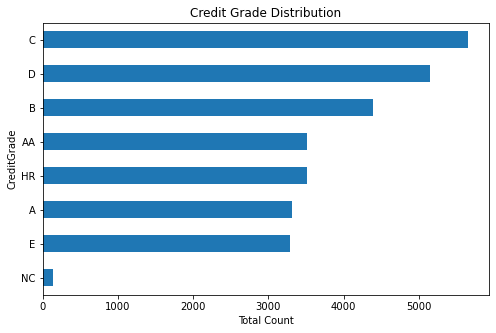

In [35]:
# Analysis on CreditGrade

plt.figure(figsize = [8, 5]) 
creditgrade_convtd.plot(kind = 'barh')
plt.ylabel('CreditGrade')
plt.xlabel('Total Count')
plt.title('Credit Grade Distribution');

The above chart shows that most borrowers fall within the C and D CreditGrade.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- My major variable of interest is the Borrower's Rate. And from the visuals, it is clearly a multimodal distribution with the highest spike at 0.3177 interest rate. This means most borrowers prefer to borrow at 0.3177 interest rate, as it has the greatest number. Also, I didn't need to perfrom any transformation, I only plotted a histogram distribution on the Borrower's Rate feature.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The only issue I had with some columns were the data-types. So I eventually had to convert the data-types from objects to category to enable me understand the analysis on the distributions.

- Also,for the Loan Status I had to represent all Past Due entries( I mean all records containing Past Due periods) as just Past Due. Kindly check the univariate distribution on the Loan Status column to understand better.


## Bivariate Exploration

In this section, I will investigate relationships between variables in the data-set.

### Numeric Variables 

In [36]:
newloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   LoanStatus           113937 non-null  category
 1   CreditGrade          28953 non-null   category
 2   EmploymentStatus     111682 non-null  category
 3   Occupation           110349 non-null  object  
 4   IsBorrowerHomeowner  113937 non-null  bool    
 5   IncomeRange          113937 non-null  object  
 6   IncomeVerifiable     113937 non-null  bool    
 7   LoanOriginalAmount   113937 non-null  int64   
 8   Term                 113937 non-null  int64   
 9   BorrowerRate         113937 non-null  float64 
dtypes: bool(2), category(3), float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [37]:
# Assigning all numerical columns to num_cols
num_cols1 = ['BorrowerRate','LoanOriginalAmount']

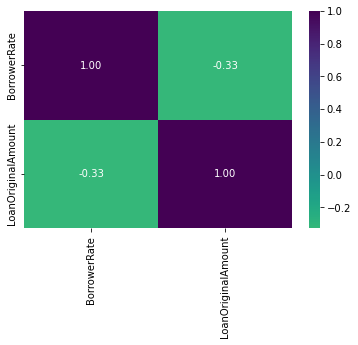

In [38]:
# Analysis on the num_cols1
sb.heatmap(newloan_data[num_cols1].corr(), annot = True, fmt = '0.2f',
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation = 90);

The graphic depicts that the BorrowerRate and the LoanOriginalAmount are negatively correlated. This means that the higher the LoanOriginalAmount, the lower the BorrowerRate and vice-versa.

### Numeric Variables vs. Categorical Variables 

In [40]:
newloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   LoanStatus           113937 non-null  category
 1   CreditGrade          28953 non-null   category
 2   EmploymentStatus     111682 non-null  category
 3   Occupation           110349 non-null  object  
 4   IsBorrowerHomeowner  113937 non-null  bool    
 5   IncomeRange          113937 non-null  object  
 6   IncomeVerifiable     113937 non-null  bool    
 7   LoanOriginalAmount   113937 non-null  int64   
 8   Term                 113937 non-null  int64   
 9   BorrowerRate         113937 non-null  float64 
dtypes: bool(2), category(3), float64(1), int64(2), object(2)
memory usage: 4.9+ MB


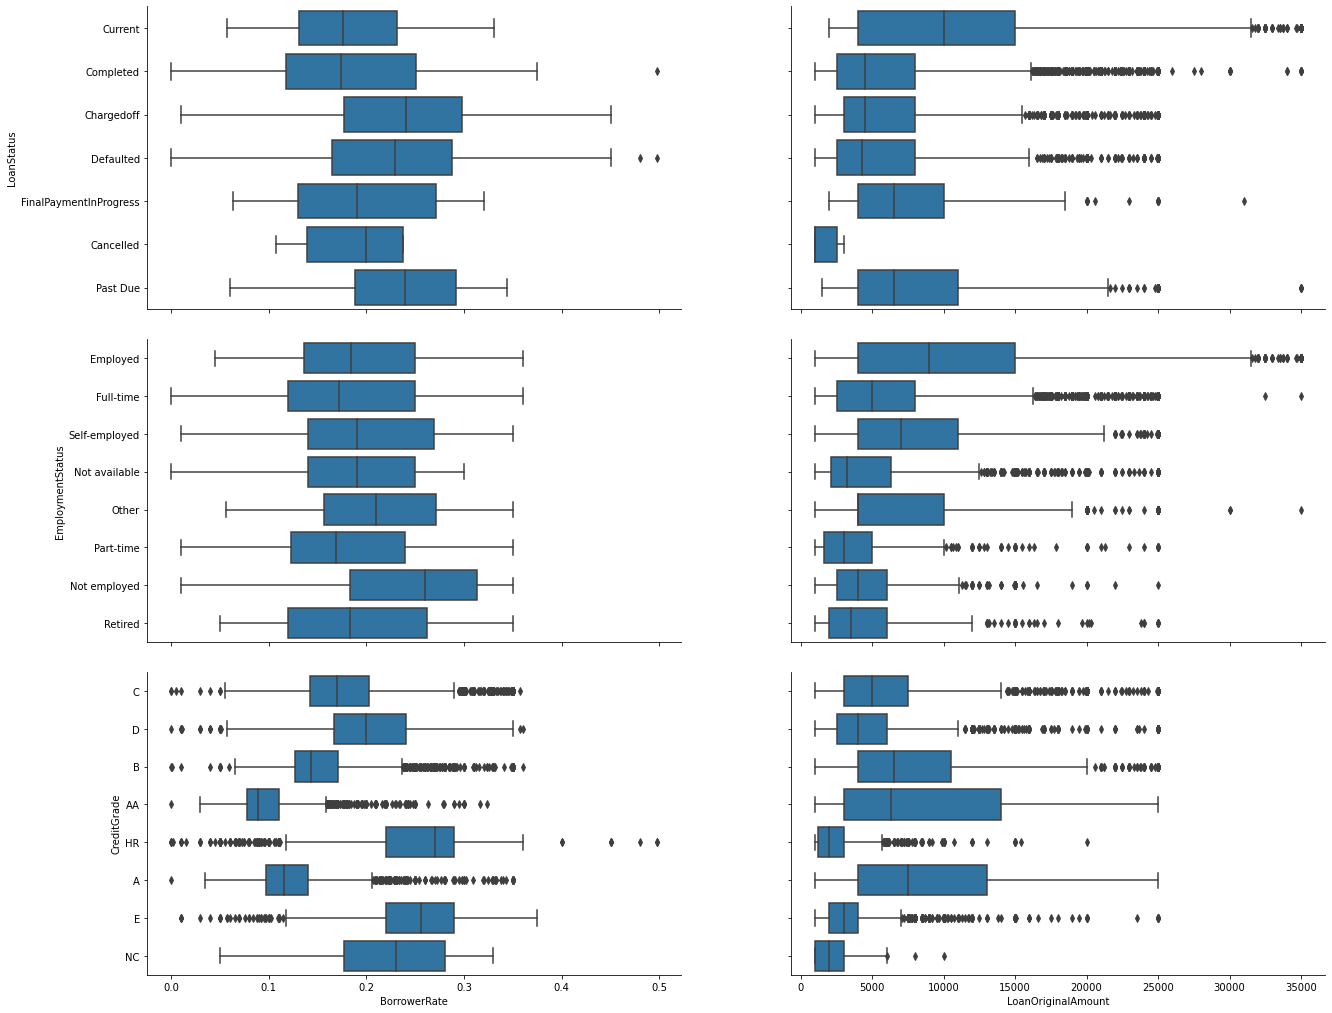

In [41]:
# Analysis on the num_cols and categ_cols

base_color = sb.color_palette()[0]
g = sb.PairGrid(data = newloan_data, x_vars =['BorrowerRate','LoanOriginalAmount'],
               y_vars = ['LoanStatus','EmploymentStatus','CreditGrade'])
g.map(sb.boxplot, color = base_color)
g.fig.set_size_inches(20,15);

##### The following insights can be gotten from the above visuals;
- Loan Status- Defaulted and Charged-off borrowers had higher interest. This is actually normal, as they have are defaulters.

- Employment Status- All borrowers within the employment status bucket are given reasonably higher interest rate, except for the borrowers whose employment status is Not-Available.

- Credit Grade- The borrowers with the higher interest rates in this category fall within D, E and HR Credit Grades.

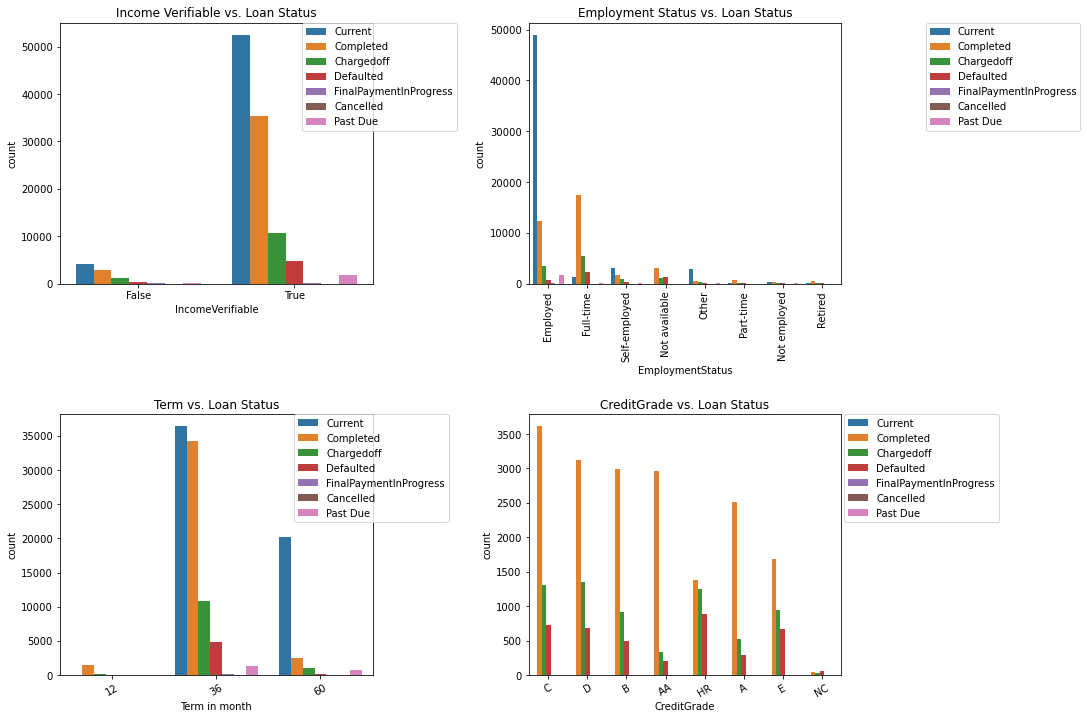

In [43]:
# Looking at the relationship between LoanStatus and other variables

plt.figure(figsize=[14, 12])

#subplot 1
plt.subplot(2,2,1)
sb.countplot(data = newloan_data, x = 'IncomeVerifiable', hue = 'LoanStatus')
plt.legend(bbox_to_anchor=(1.27, 1),
           borderaxespad=0) # push the legend to the side
plt.title('Income Verifiable vs. Loan Status');


#subplot 2
plt.subplot(2,2,2)
sb.countplot(data = newloan_data, x = 'EmploymentStatus', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.27, 1),
           borderaxespad=0)
plt.title('Employment Status vs. Loan Status');

#subplot 3
plt.subplot(2,2,3)
sb.countplot(data = newloan_data, x = 'Term', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(0.75, 1),
           borderaxespad=0)
plt.xlabel('Term in month')
plt.title('Term vs. Loan Status');

#subplot 4
plt.subplot(2,2,4)
sb.countplot(data = newloan_data, x = 'CreditGrade', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('CreditGrade vs. Loan Status');

plt.subplots_adjust(wspace=0.50, 
                    hspace=0.5);



##### The following insights can be gotten from the above visuals;

- Verified borrowers were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Employed borrowers were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Borrowers willing to pay within 36 month term were give more loans and out of this number, majority of the loans were allocated to mostly borrowers with current and completed loan status. 

- Borrowers that fall within the C credit-grade were give more loans and out of this number, majority of the loans were allocated to mostly borrowers with completed and charged-off loan status. 

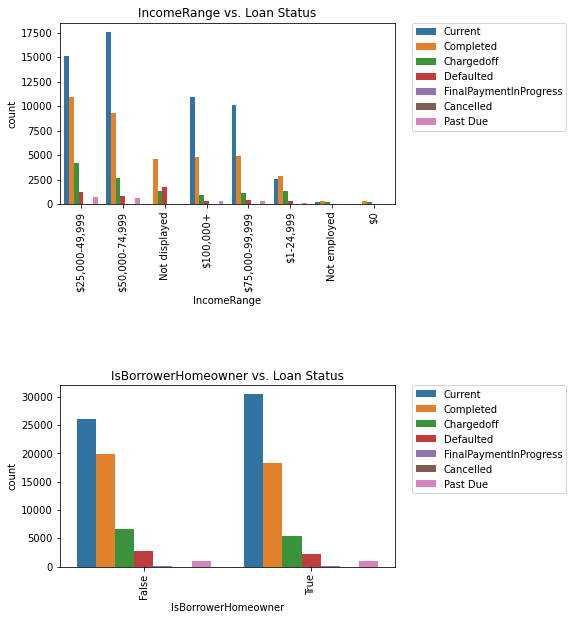

In [44]:
# Looking at more relationships between LoanStatus and other variables

plt.figure(figsize=[6, 10])
#subplot 5
plt.subplot(2,1,1)
sb.countplot(data = newloan_data, x = 'IncomeRange', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1),
           borderaxespad=0)
plt.title('IncomeRange vs. Loan Status');

#subplot 6
plt.subplot(2,1,2)
sb.countplot(data = newloan_data, x = 'IsBorrowerHomeowner', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1),
           borderaxespad=0)
plt.title('IsBorrowerHomeowner vs. Loan Status');

plt.subplots_adjust(hspace=1)

##### The following insights can be gotten from the above visuals;

- Borrowers with income range between $25,000-74,999 were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Borrowers that are home owners were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The graphic depicts that the BorrowerRate and the LoanOriginalAmount are negatively correlated. This means that the higher the LoanOriginalAmount, the lower the BorrowerRate and vice-versa.

- Defaulted and Charged-off borrowers had higher interest. This is actually normal, as they have are defaulters.

- All borrowers within the employment status bucket are guven reasonably higher interest rate, except for the borrowers whose employment status is Not-Available.

- The borrowers with the higher interest rates in this category fall within D, E and HR Credit Grades.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- Verified borrowers were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Employed borrowers were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Borrowers willing to pay within 36 month term were give more loans and out of this number, majority of the loans were allocated to mostly borrowers with current and completed loan status. 

- Borrowers that fall within the C credit-grade pay were give more loans and out of this number, majority of the loans were allocated to mostly borrowers with completed and charged-off loan status. 

- Borrowers with income range between $25,000-74,999 were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Borrowers that are home owners were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.


## Multivariate Exploration


In this section, I will investigate relationships between more variables in the data-set.

In [45]:
newloan_data.head()

,LoanStatus,CreditGrade,EmploymentStatus,Occupation,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,LoanOriginalAmount,Term,BorrowerRate
0,Completed,C,Self-employed,Other,True,"$25,000-49,999",True,9425,36,0.1580
1,Current,NaN,Employed,Professional,False,"$50,000-74,999",True,10000,36,0.0920
2,Completed,HR,Not available,Other,False,Not displayed,True,3001,36,0.2750
3,Current,NaN,Employed,Skilled Labor,True,"$25,000-49,999",True,10000,36,0.0974
4,Current,NaN,Employed,Executive,True,"$100,000+",True,15000,36,0.2085


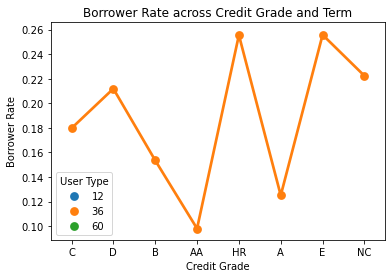

In [46]:
# Analysis on CreditGrade, BorrowerRate and Term

sb.pointplot(data=newloan_data, x='CreditGrade', y='BorrowerRate', hue='Term', errwidth=0)
plt.xlabel('Credit Grade')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate across Credit Grade and Term')
plt.legend(title='User Type')
plt.show()

The above chart clearly shows that the relationship between BorrowerRate and CreditGrade contained only the 36-month term. Nonetheless, the HR had the highest borrower rate for the 36-month term as shown in the chart.

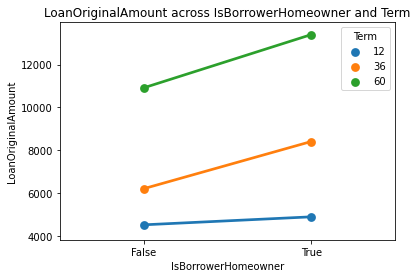

In [47]:
# Analysis on IsBorrowerHomeowner, LoanOriginalAmount and Term

sb.pointplot(data=newloan_data, x='IsBorrowerHomeowner', y='LoanOriginalAmount', hue='Term', errwidth=0)
plt.xlabel('IsBorrowerHomeowner')
plt.ylabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount across IsBorrowerHomeowner and Term')
plt.legend(title='Term')
plt.show()

This shows that the loan original amount is way lesser for borrower's that don't own a house through out the term period.

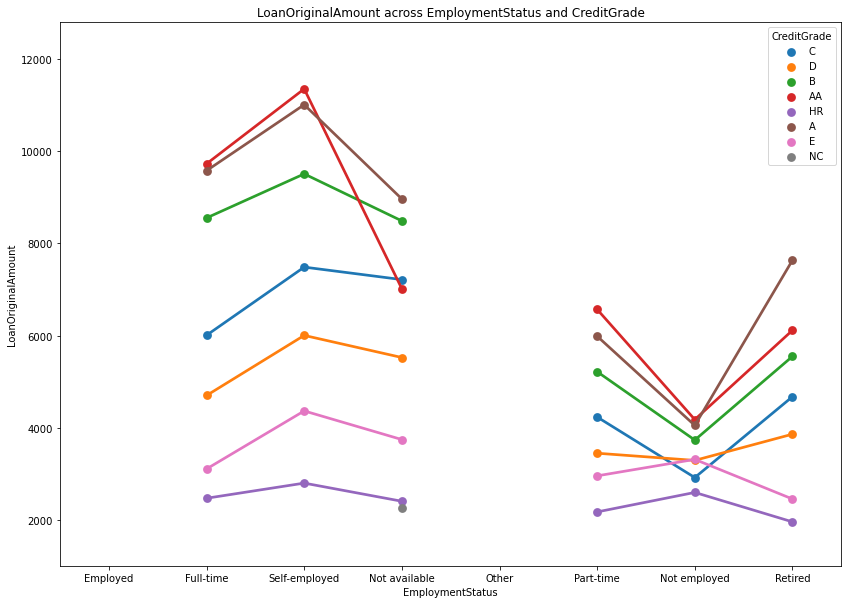

In [48]:
# Analysis on LoanOriginalAmount, EmploymentStatus and CreditGrade

fig = plt.figure(figsize=[14,10])
sb.pointplot(data=newloan_data, x='EmploymentStatus', y='LoanOriginalAmount', hue='CreditGrade', errwidth=0)
plt.xlabel('EmploymentStatus')
plt.ylabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount across EmploymentStatus and CreditGrade')
plt.legend(title='CreditGrade')
plt.show()

From the chart above, there's no loan original amount for the employed category. Also, it is worthy to note that the AA credit grade category has the highest loan original amount across all the employment status except for the Retired which had the A credit grade having the highest loan original amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The relationship between BorrowerRate and CreditGrade contained only the 36-month term. Nonetheless, the HR had the highest borrower rate for the 36-month term as shown in the chart.

- The loan original amount is way lesser for borrower's that don't own a house through out the term period. This is a very important insight as it explains the difference in loans depending on the loan original amount.

- There's no loan original amount for the employed category. Also, it is worthy to note that the AA credit grade category has the highest loan original amount across all the employment status except for the Retired which had the A credit grade having the highest loan original amount.

### Were there any interesting or surprising interactions between features?

- The relationship between BorrowerRate and CreditGrade contained only the 36-month term. This came as a surprise.

- Also, there's no loan original amount for the employed category.

## Conclusions

- The following(not limited to this) factors determine the Loan outcome status of a borrower; CreditGrade, EmploymentStatus, Occupation, IsBorrowerHomeowner, IncomeRange, IncomeVerifiable, LoanOriginalAmount, Term, BorrowerRate.

- Also, the following(not limited to this) factors affect the interest rate of a borrower; CreditGrade, EmploymentStatus, Occupation, IsBorrowerHomeowner, IncomeRange, IncomeVerifiable, LoanOriginalAmount, Term, BorrowerRate.

- Finally, The loan original amount is way lesser for borrowers that don't own a house through out a term-period. This means there is a difference in loans depending on the loan original amount.

